# **Reconocimiento de Emociones**

# 1.FER2013 Dataset y el problema con la categoría 'disgust'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto AI 2.0/fer2013.csv')

print(df.info())
print(df["Usage"].value_counts())

print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [ ]:
df.shape

(35887, 3)

In [ ]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e2862b790>]],
      dtype=object)

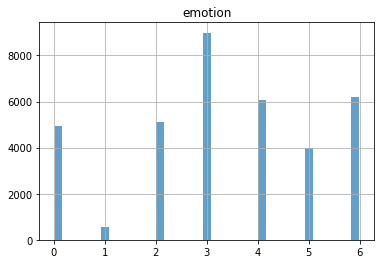

In [ ]:

df.hist(column='emotion',bins='auto', alpha=0.7 , rwidth=0.85)
# 0= Angry 1= Disgust 2= Fear 3= Happy 4 = sad 5= surprise 6 = neutral

# 2.Preparación de los datos

In [ ]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
!pip install brewer2mpl
import brewer2mpl



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def emotion_count(y_train, classes):
    """
    Esta función reclasifica la etiqueta 'Disgust' como 'Angry'
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

In [ ]:
def load_data(sample_split=0.3, usage='Training',classes=['Angry','Happy'], filepath='/content/drive/MyDrive/Colab Notebooks/Proyecto AI 2.0/fer2013.csv'):
    """
    Esta función carga el dataset en formato csv y realizamos el reshape y rescale de los datos para el feeding del modelo
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape en las dimensiones 48*48*1 y rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

In [ ]:
## Los tres conjuntos de datos se los pasa por la función para utilizarlos luego
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

X_test, y_test = load_data(sample_split=1.0,classes=emo,
usage='PrivateTest')

X_train, y_train = load_data(sample_split=1.0,classes=emo,
usage= 'Training')

X_val,y_val = load_data(sample_split=1.0,classes=emo,
usage= 'PublicTest')

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de19cdd10>,
      dtype=object)

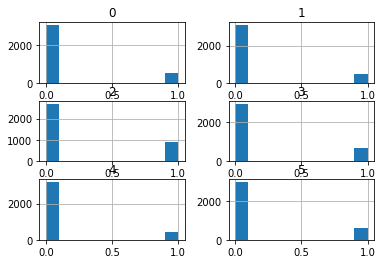

In [ ]:
pd.DataFrame(data=y_val).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de0eb2ad0>,
      dtype=object)

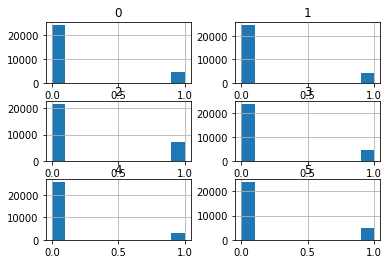

In [ ]:
pd.DataFrame(data=y_train).hist()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


In [ ]:
def save_data(X_test, y_test, fname=''):
    """
    La función almacena los datos cargados en formato numpy para luego realizar el procesamiento
    """
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (zip(labels, counts))

Private test set


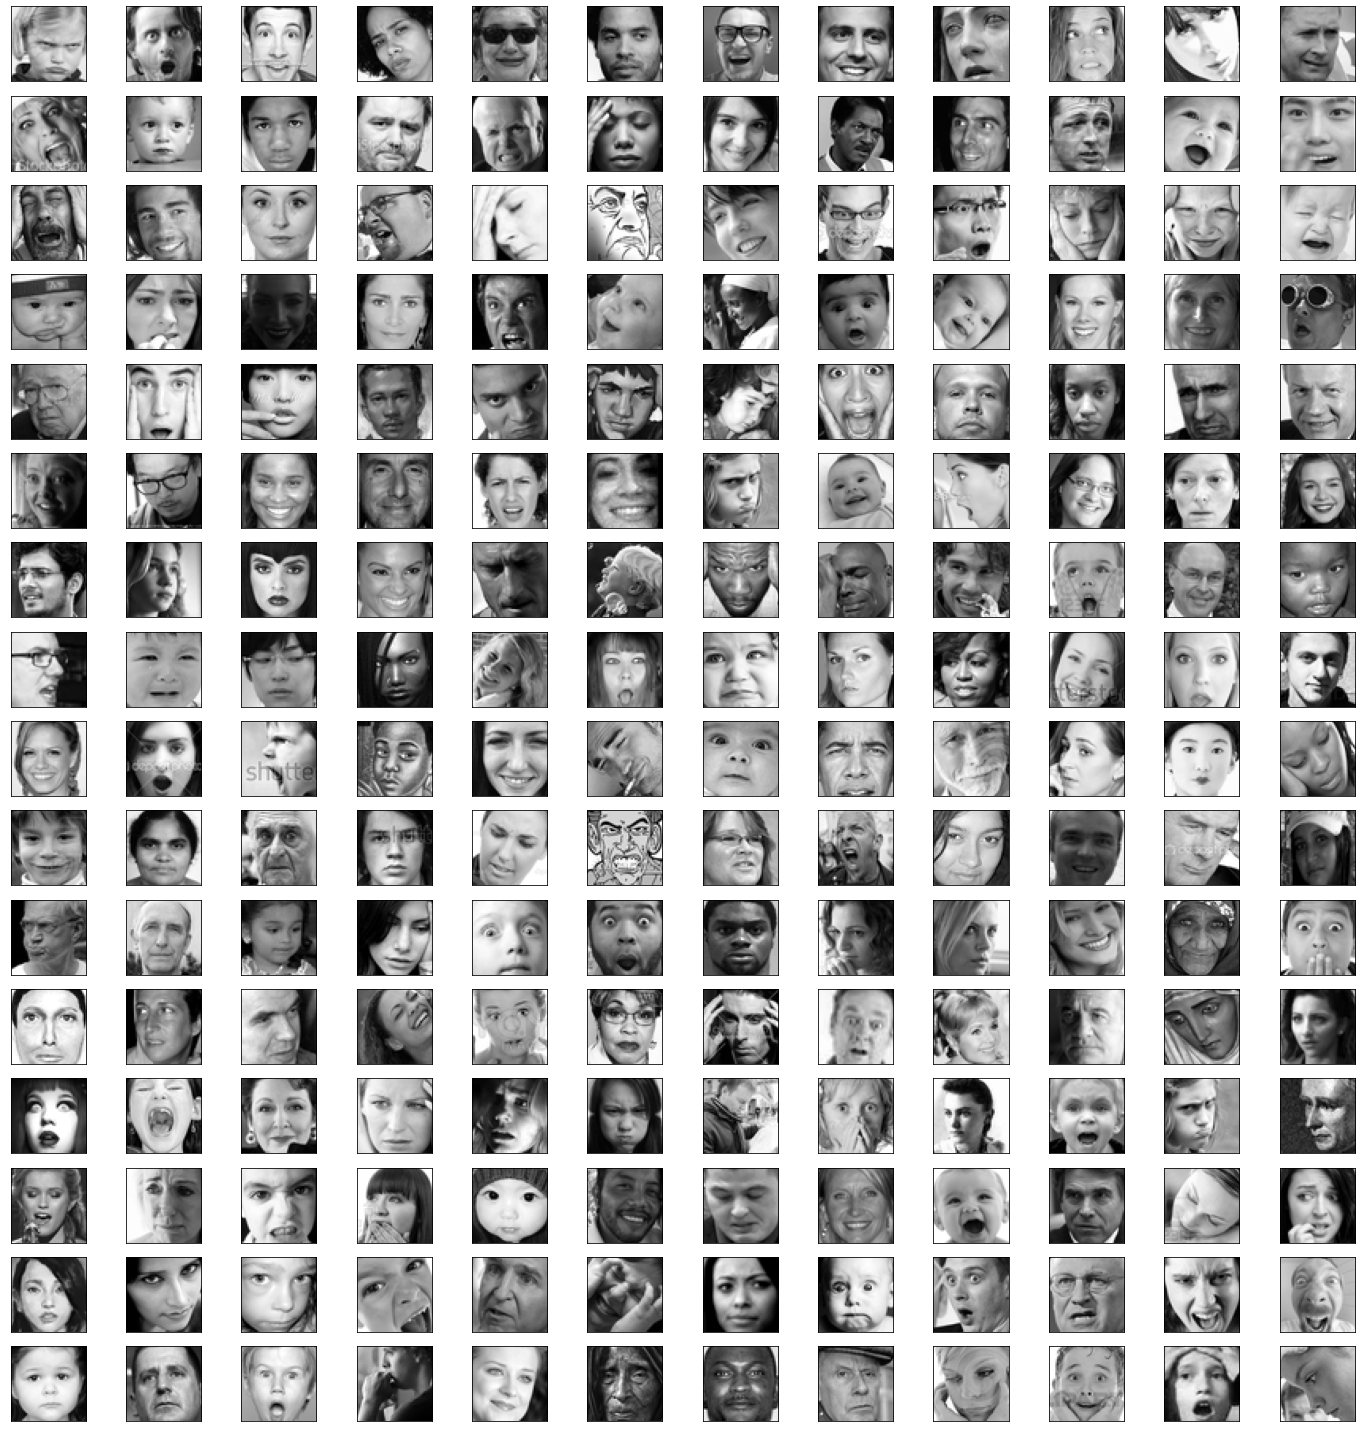

In [ ]:
def overview(start, end, X):
    """
    Esta función es para previsualizar los datos en forma de plot
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X)

(1, 48, 48, 1)


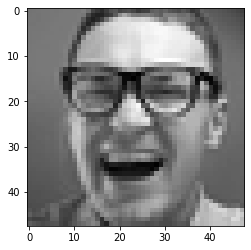

In [ ]:
input_img = X[6:7,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [ ]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

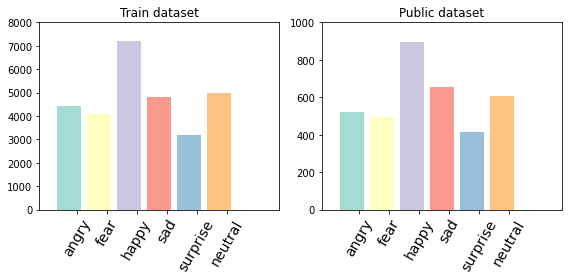

In [ ]:
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
    """
    La función se utiliza para trazar la distribución de las etiquetas del conjunto de datos proporcionados 
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train dataset', 'Public dataset'], \
                  ylims =[8000,1000]) 

# 2.Modelo de la Red Neuronal

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Dropout,Flatten,Dense

In [ ]:
modelN = models.Sequential()

modelN.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu',name = 'conv1'))
modelN.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(layers.Conv2D(128, kernel_size=(3, 3),padding="same", activation='relu', name = 'conv2'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv3'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv4'))
modelN.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv5'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv6'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv7'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv8'))
modelN.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv9'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv10'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv11'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv12'))
modelN.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))

modelN.add(layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv13'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv14'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu',  name = 'conv16'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(256, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv17'))
modelN.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2)))
modelN.add(Dropout(0.25))


modelN.add(layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv22'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv23'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu',  name = 'conv24'))
modelN.add(BatchNormalization())
modelN.add(layers.Conv2D(512, kernel_size=(3, 3), padding="same", activation='relu', name = 'conv25'))
modelN.add(BatchNormalization())
modelN.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
modelN.add(Dropout(0.25))


modelN.add(Flatten())
modelN.add(Dense(6, activation='softmax'))
print(modelN.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
conv1 (Conv2D)               (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 22, 22, 128)       7

In [ ]:
opt = Adam(lr=0.0001, decay=1e-6)
modelN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:

num_epochs = 50
batch_size = 150


history = modelN.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
          validation_data=(X_val, y_val), shuffle=True, verbose=2,callbacks = callbacks_list)



Epoch 1/50
192/192 - 57s - loss: 2.2713 - accuracy: 0.1751 - val_loss: 1.7674 - val_accuracy: 0.2494

Epoch 00001: val_loss improved from inf to 1.76742, saving model to weights_min_loss.hdf5
Epoch 2/50
192/192 - 20s - loss: 2.0385 - accuracy: 0.1927 - val_loss: 1.7762 - val_accuracy: 0.2499

Epoch 00002: val_loss did not improve from 1.76742
Epoch 3/50
192/192 - 20s - loss: 1.9570 - accuracy: 0.2043 - val_loss: 1.7614 - val_accuracy: 0.2524

Epoch 00003: val_loss improved from 1.76742 to 1.76138, saving model to weights_min_loss.hdf5
Epoch 4/50
192/192 - 20s - loss: 1.9125 - accuracy: 0.2145 - val_loss: 1.7645 - val_accuracy: 0.2446

Epoch 00004: val_loss did not improve from 1.76138
Epoch 5/50
192/192 - 21s - loss: 1.9003 - accuracy: 0.2184 - val_loss: 1.7545 - val_accuracy: 0.2494

Epoch 00005: val_loss improved from 1.76138 to 1.75455, saving model to weights_min_loss.hdf5
Epoch 6/50
192/192 - 20s - loss: 1.8847 - accuracy: 0.2230 - val_loss: 1.7472 - val_accuracy: 0.2510

Epoch 00

'\nhistory = modelN.fit_generator(train_flow, \n                    steps_per_epoch=len(X_train) / batch_size, \n                    epochs=num_epochs,  \n                    verbose=2,  \n                    callbacks=callbacks_list,\n                    validation_data=val_flow,  \n                    validation_steps=len(X_val) / batch_size) \n'

# 3.Evaluación del Modelo

INFO:tensorflow:Assets written to: facial_1/assets


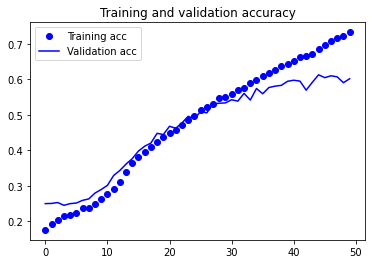

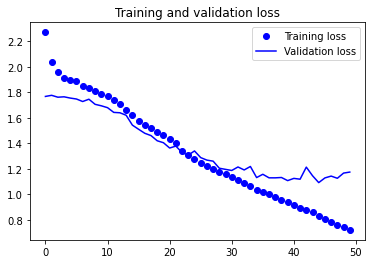

In [ ]:
modelN.save('facial_1')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score = modelN.evaluate(X, y, verbose=0)
print ("model %s: %.2f%%" % (modelN.metrics_names[1], score[1]*100))

model accuracy: 62.19%


In [ ]:
y_prob = modelN.predict(X, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

In [ ]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    """
    La función se utiliza para indicar de que emoción trata la imagen
    """
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry', 1:'Fear', 2:'Happy', 3:'Sad', 4:'Surprise', 5:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [ ]:
import brewer2mpl
def plot_probs(start,end, y_prob):
    """
    La función se utiliza para graficar la probabilidad en el histograma para seis etiquetas 
    """
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
        ax.bar(np.arange(0,6), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.5,6.5,1))
        labels = ['angry', 'fear', 'happy', 'sad', 'surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [ ]:
def plot_subjects_with_probs(start, end, y_prob):
    """
    Esta función sirve para representar la probabilidad que predice el modelo junto con su imagen
    """
    iter = int((end - start)/6)
    for i in np.arange(0,iter):
        plot_subjects(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

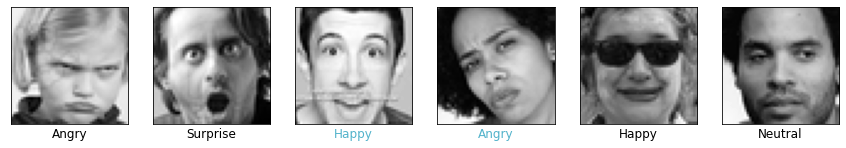

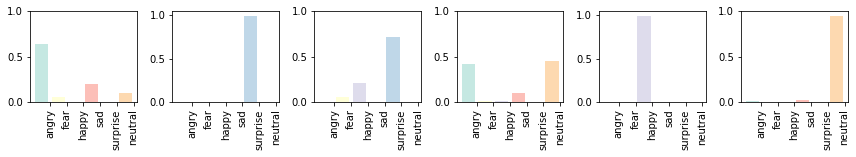

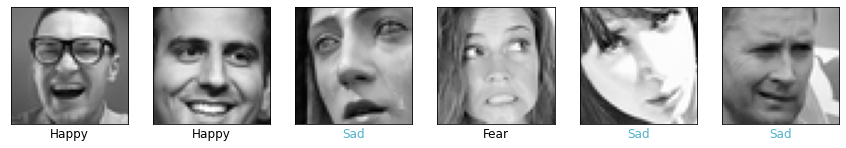

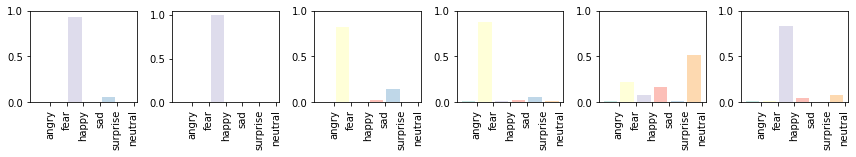

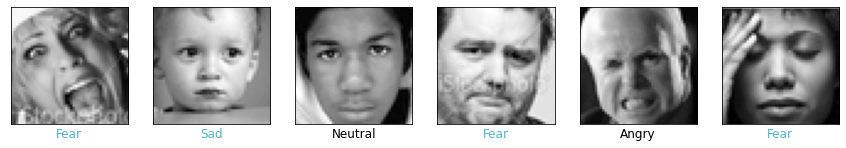

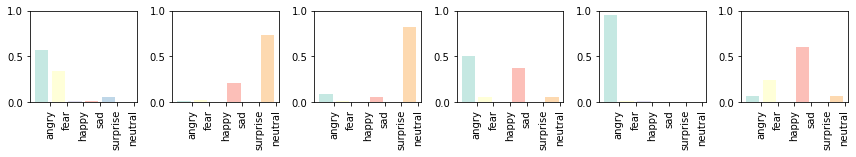

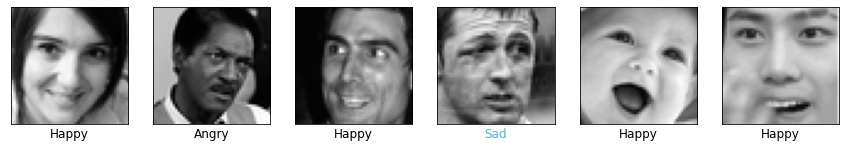

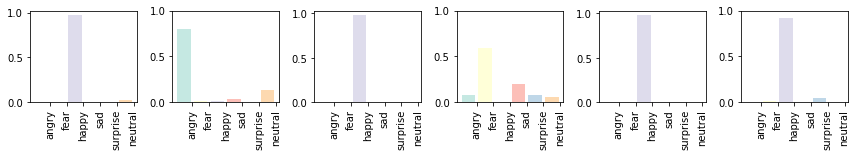

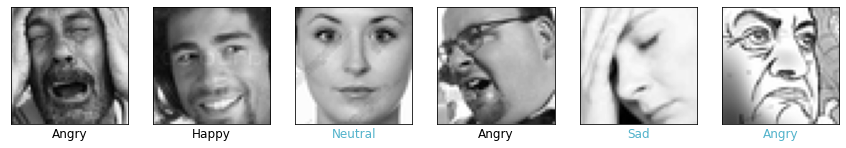

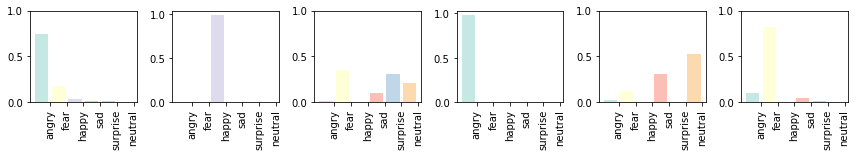

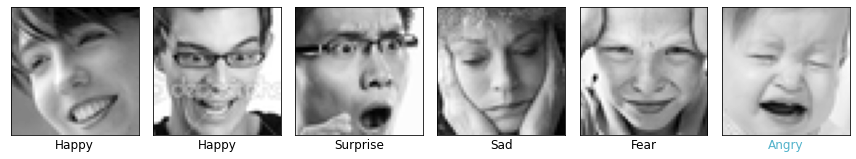

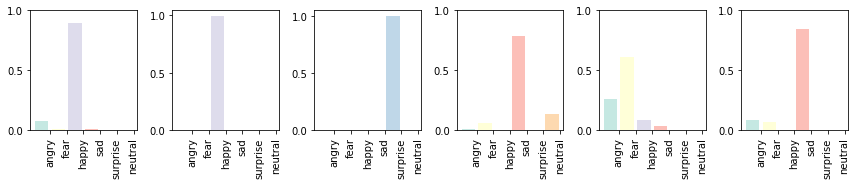

In [ ]:
from matplotlib.pyplot import *
plot_subjects_with_probs(0, 36, y_prob)

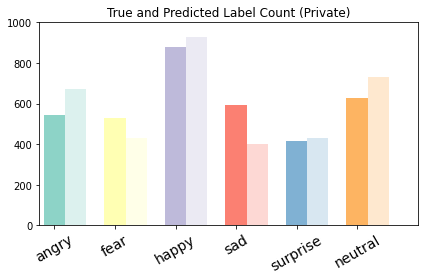

In [ ]:
def plot_distribution2(y_true, y_pred):
    """
    La función se utiliza para comparar el número de etiquetas verdaderas así como los resultados de la predicción
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    ind = np.arange(1.5,7,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,7,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 7.5])
    ax.set_ylim([0, 1000])
    ax.set_title('True and Predicted Label Count (Private)')
    plt.tight_layout()
    plt.show()
    
plot_distribution2(y_true, y_pred)

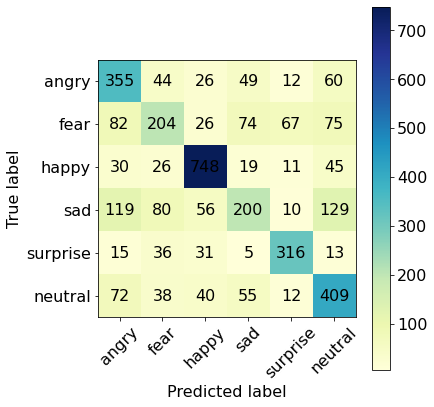

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    """
    Función para generar la matriz de confusión
    """
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,6):
        for j in range(0,6):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)
plt.show()

In [ ]:
#Guardando el modelo
fer_json=modelN.to_json()
with open("fer.json","w") as json_file:
    json_file.write(fer_json)
modelN.save_weights("fer.h5")
print("Saved model to disk")

Saved model to disk
